In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.covariance import EmpiricalCovariance
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.datasets import make_circles
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.cluster import KMeans
import numpy as np
np.random.seed(123)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import TimeSeriesSplit
import seaborn as sns
sns.set_style('dark')
from datetime import datetime, timedelta
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = (15, 6)

import matplotlib.pyplot as plt
import pandas as pd
import math

import tensorflow as tf
tf.random.set_seed(1234)

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN, GRU, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from IPython.display import set_matplotlib_formats
import warnings


warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('international-airline-passengers.csv')
df

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [10]:
df[['Month']].value_counts
# 144. rowu silmek lazım

<bound method DataFrame.value_counts of                                                  Month
0                                              1949-01
1                                              1949-02
2                                              1949-03
3                                              1949-04
4                                              1949-05
..                                                 ...
140                                            1960-09
141                                            1960-10
142                                            1960-11
143                                            1960-12
144  International airline passengers: monthly tota...

[145 rows x 1 columns]>

In [11]:
df = df.drop(df.index[144])
df

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0


In [12]:
df['Month'] = pd.to_datetime(df['Month'],yearfirst=True)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                                                                          Non-Null Count  Dtype         
---  ------                                                                          --------------  -----         
 0   Month                                                                           144 non-null    datetime64[ns]
 1   International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB


In [15]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Month,144,1954-12-16 05:00:00,1949-01-01 00:00:00,1951-12-24 06:00:00,1954-12-16 12:00:00,1957-12-08 18:00:00,1960-12-01 00:00:00,NaN
International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60,144.0,280.298611,104.0,180.0,265.5,360.5,622.0,119.966317


In [16]:
df.index = df['Month']

In [17]:
df

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
Month,,
1949-01-01,1949-01-01,112.0
1949-02-01,1949-02-01,118.0
1949-03-01,1949-03-01,132.0
1949-04-01,1949-04-01,129.0
1949-05-01,1949-05-01,121.0
...,...,...
1960-08-01,1960-08-01,606.0
1960-09-01,1960-09-01,508.0
1960-10-01,1960-10-01,461.0


In [18]:
df = df.drop('Month',axis=1)
df.columns = ['Passengers']
df.head()

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


### Veri şimdi insana benzedi buradan itibaren bir şeyler yapmak daha makul

<Axes: xlabel='Month'>

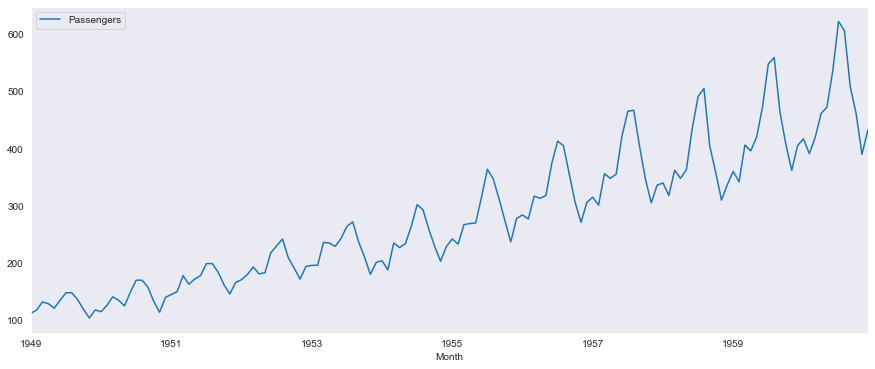

In [19]:
df.plot()


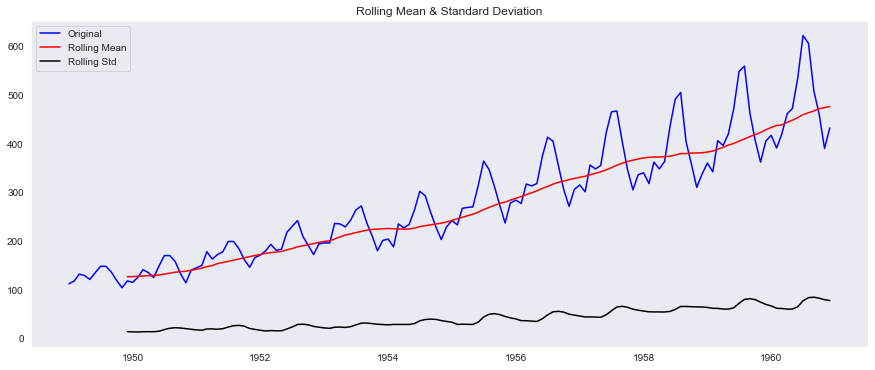

In [20]:
from statsmodels.tsa.stattools import adfuller as adf
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
test_stationarity(df)

In [22]:
output = (adf(df['Passengers']))
output

(0.8153688792060457,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [23]:
dfoutput = pd.Series(output[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in output[4].items():
        dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


#### estimating trend and seasonlity


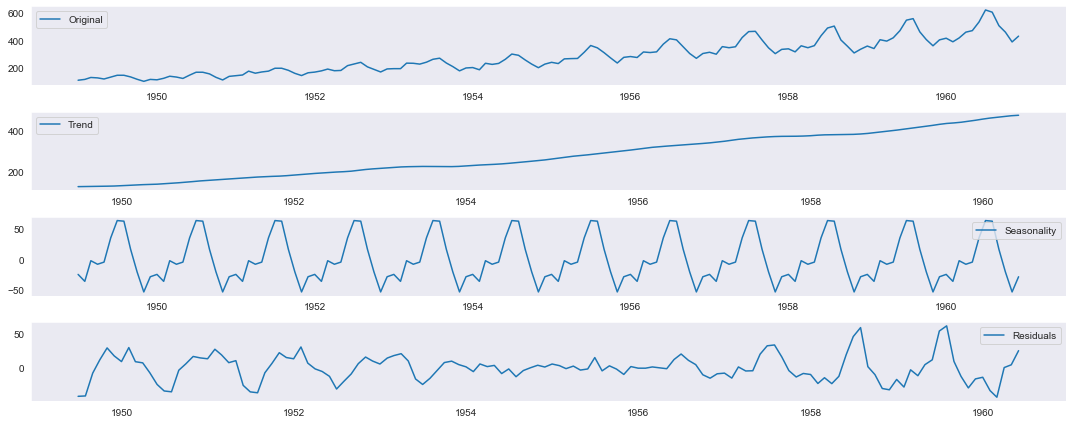

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

<Axes: xlabel='Month'>

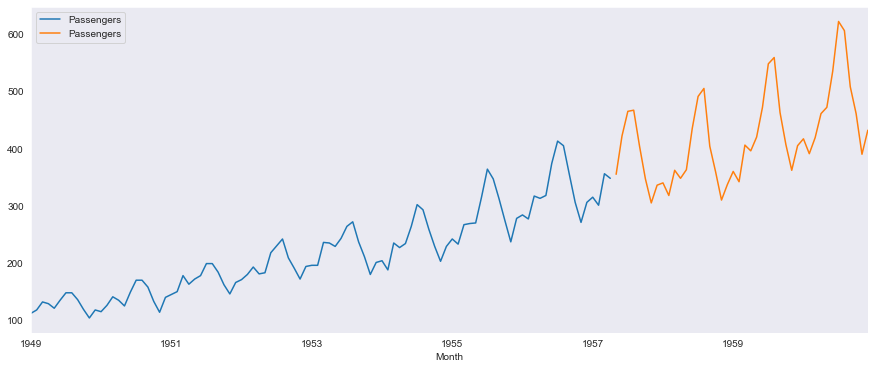

In [25]:
#divide into train and validation set
train = df[:int(0.7*(len(df)))]
valid = df[int(0.7*(len(df))):]

#plotting the data
ax = train.plot()
valid.plot(ax=ax)

### Önce arima kullanalım

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=909.769, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=907.370, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=904.979, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=908.785, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=900.136, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=904.858, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=898.911, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=903.548, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=906.025, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=896.369, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=903.746, Time=0.03 se

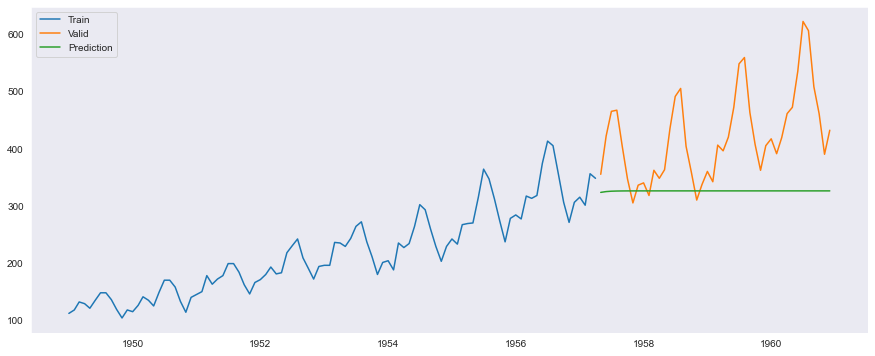

In [27]:
#building the model
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.legend(loc='best')
plt.show()

### bir de sarima kullanalım

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=647.761, Time=0.44 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=650.796, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=644.203, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=644.733, Time=0.10 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=645.995, Time=0.02 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=646.172, Time=0.19 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=646.187, Time=0.15 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=644.600, Time=0.11 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.39 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=647.442, Time=0.05 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=646.085, Time=0.10 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=645.647, Time=0.11 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=644.346, Time=0.07 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=647.580, Time=0.17 sec
 ARIMA(1,1,0)(1,1,0)[12] intercept   

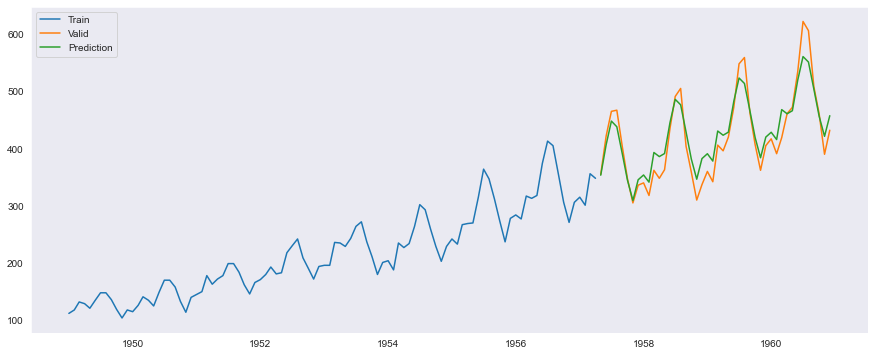

In [28]:
#using sarimax to account for seasonality and then forecasting
#building the model
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True,seasonal=True,m=12,D=1)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.legend(loc='best')
plt.show()

### Sezonluk durumu değerli olan bir veri tipinde, sarimax baya güzel sonuçlar verdi.

# Aynı veri üzerinde bir de RNN denemek istiyorum

In [51]:
df = pd.read_csv('international-airline-passengers.csv')
df.head()

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [52]:
df.rename(columns={"International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60": "Passengers"}, inplace=True)
df = df.drop(df.index[144])
df

,Month,Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0


Text(0, 0.5, 'Number of passengers')

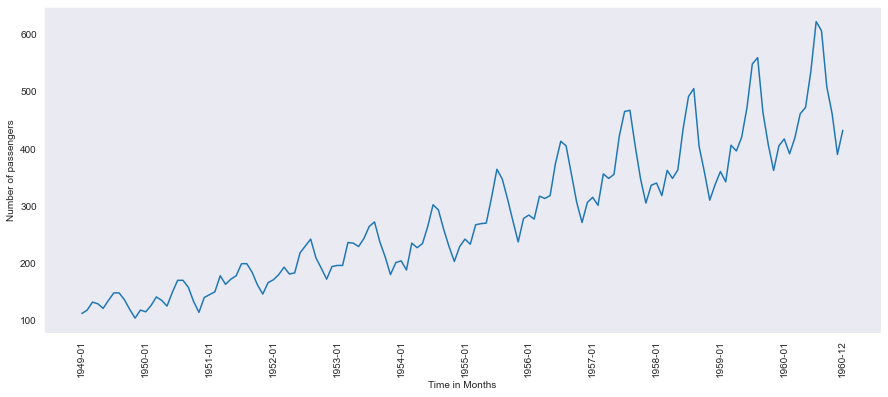

In [53]:
linspace = [0]
while linspace[-1] < 143-12:
    linspace.append(linspace[-1]+12)
linspace.append(143)

plt.plot(df['Month'], df['Passengers'])
plt.xticks(linspace, rotation='vertical')
plt.xlabel('Time in Months')
plt.ylabel('Number of passengers')

In [54]:
dataMat = df['Passengers'].values.reshape(len(df),1)
dataMat.shape

(144, 1)

In [56]:
scaler = MinMaxScaler(feature_range=(0,1))
scaledDataMat = scaler.fit_transform(dataMat)

In [32]:
scaledDataMat

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [59]:
train_split = 0.7
train_size = int(train_split * len(df))
trainData = scaledDataMat[:train_size]
valData = scaledDataMat[train_size:]
print('Train data size: ', trainData.shape)
print('Val data size: ', valData.shape)

Train data size:  (100, 1)
Val data size:  (44, 1)


In [60]:
def createDataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step):
        dataX.append(dataset[i:(i+time_step)])
        dataY.append(dataset[i + time_step])
    return np.array(dataX), np.array(dataY)

In [61]:
n_past = 4
X_train,y_train = createDataset(trainData, time_step=n_past)
X_val,y_val = createDataset(valData, time_step=n_past)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(96, 4, 1) (96, 1)
(40, 4, 1) (40, 1)


In [62]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(n_past,1)))
model.add(LSTM(64, return_sequences=False, input_shape=(n_past,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
history = model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=50,batch_size=1,verbose=1, callbacks=[callback])

Epoch 1/50
96/96 [==============================] - 2s 7ms/step - loss: 0.0151 - val_loss: 0.0378
Epoch 2/50
96/96 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0307
Epoch 3/50
96/96 [==============================] - 0s 3ms/step - loss: 0.0071 - val_loss: 0.0311
Epoch 4/50
96/96 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.0455
Epoch 5/50
96/96 [==============================] - 0s 3ms/step - loss: 0.0055 - val_loss: 0.0314
Epoch 6/50
96/96 [==============================] - 0s 2ms/step - loss: 0.0072 - val_loss: 0.0249
Epoch 7/50
96/96 [==============================] - 0s 2ms/step - loss: 0.0053 - val_loss: 0.0440
Epoch 8/50
96/96 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0225
Epoch 9/50
96/96 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0221
Epoch 10/50
96/96 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 0.0191
Epoch 11/50
96/96 [

In [63]:
y_train_hat = scaler.inverse_transform(model.predict(X_train))
y_val_hat = scaler.inverse_transform(model.predict(X_val))

2/2 [==============================] - 0s 3ms/step


Text(0, 0.5, 'Number of passengers')

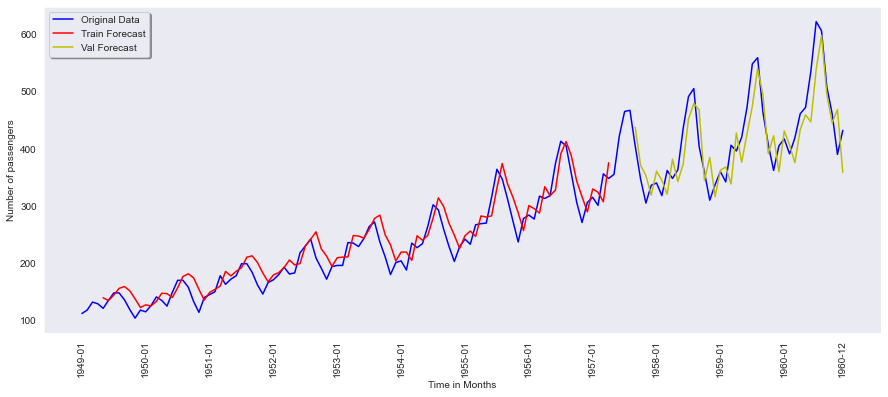

In [65]:
train_shift = n_past
test_shift = train_shift + len(y_train_hat) + n_past

plt.plot(df['Month'], df['Passengers'], color='b', label="Original Data")
plt.plot(df['Month'][train_shift: test_shift-n_past], y_train_hat, color='r', label="Train Forecast")
plt.plot(df['Month'][test_shift:], y_val_hat, color='y', label="Val Forecast")
plt.legend(loc='best', shadow=True)

plt.xticks(linspace, rotation='vertical')
plt.xlabel('Time in Months')
plt.ylabel('Number of passengers')

### RNN de gayet başarılı bir trend yakalayabilme sürecini gerçekleştirdi.